In [22]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd

import nltk
import re

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize

%matplotlib inline

import time

from datetime import datetime



In [2]:
from transformers import pipeline

In [3]:
classifier = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [4]:
sample_text="The bank is fine once the chairman’s unearned bonus is factored in. But when you realise that payment of the huge cash bonus means that money is taken from staff wages and customer fees to the disbenefit of its customers you realise that it is designed to milk you taking the money to one person. I am sorry but this makes no sense.It has no locality and no branches. Avoid if at all possible."
# classifier(sample_text, min_length = round(0.1 * len(sample_text)), max_length = round(0.2 * len(sample_text)))
summary=classifier(sample_text, min_length = 5, max_length = 20)

# summary=classifier(sample_text)
summary[0]['summary_text']

' The bank is fine once the chairman’s unearned bonus is factored in'

In [31]:
# rating='stars=1'
# page_no='page='
# dates_compiled=[]
# summarised_text=[]
# text_compiled=[]
# for page in range(1,2):
    
#     URL='https://uk.trustpilot.com/review/lloydsbank.com?'+page_no+str(page)+'&'+rating
#     print(URL)
#     req = requests.get(URL)
#     soup = BeautifulSoup(req.content, 'html.parser')
#     texts = soup.find_all('p', {'class': 'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn'})
#     dates=soup.find_all('p',{'class':'typography_body-m__xgxZ_ typography_appearance-default__AAY17 typography_color-black__5LYEn'})

#     for i in range(20):
#         date_str=dates[i].text[20:]
#         date_object = datetime.strptime(date_str, '%d %B %Y').date()
#         dates_compiled.append(date_object)
#         text_compiled.append(str(texts[i].text))
#         summary=classifier(str(texts[i].text), min_length = 5, max_length = 40)
#         summarised_text.append(summary)


In [2]:
Number_URL='https://uk.trustpilot.com/review/lloydsbank.com?date=last12months'
req_new = requests.get(Number_URL)
soup_new = BeautifulSoup(req_new.content, 'html.parser')
page_no = soup_new.find_all('span', {'class': 'typography_heading-xxs__QKBS8 typography_appearance-inherit__D7XqR typography_disableResponsiveSizing__OuNP7'})

In [3]:
page_no[7].text

'4'

In [4]:
page_no

[<span class="typography_heading-xxs__QKBS8 typography_appearance-inherit__D7XqR typography_disableResponsiveSizing__OuNP7">For businesses</span>,
 <span class="typography_heading-xxs__QKBS8 typography_appearance-inherit__D7XqR typography_disableResponsiveSizing__OuNP7">Write a review</span>,
 <span class="typography_heading-xxs__QKBS8 typography_appearance-inherit__D7XqR typography_disableResponsiveSizing__OuNP7">Take a look</span>,
 <span class="typography_heading-xxs__QKBS8 typography_appearance-inherit__D7XqR typography_disableResponsiveSizing__OuNP7">Previous</span>,
 <span class="typography_heading-xxs__QKBS8 typography_appearance-inherit__D7XqR typography_disableResponsiveSizing__OuNP7">1</span>,
 <span class="typography_heading-xxs__QKBS8 typography_appearance-inherit__D7XqR typography_disableResponsiveSizing__OuNP7">2</span>,
 <span class="typography_heading-xxs__QKBS8 typography_appearance-inherit__D7XqR typography_disableResponsiveSizing__OuNP7">3</span>,
 <span class="typog

In [4]:
rating='stars=1'
page_no='page='
dates_compiled=[]
summarised_text=[]
text_compiled=[]


for page in range(1,10):
    time.sleep(0.5)
    #https://uk.trustpilot.com/review/lloydsbank.com?date=last12months&page=2&stars=1
    URL='https://uk.trustpilot.com/review/lloydsbank.com?date=last12months&'+page_no+str(page)+'&'+rating
    print(URL)
    req = requests.get(URL)
    soup = BeautifulSoup(req.content, 'html.parser')
    texts = soup.find_all('p', {'class': 'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn'})
    dates=soup.find_all('p',{'class':'typography_body-m__xgxZ_ typography_appearance-default__AAY17 typography_color-black__5LYEn'})

    for i in range(19):
        date_str=dates[i].text[20:]
        date_object = datetime.strptime(date_str, '%d %B %Y').date()
        dates_compiled.append(date_object)
#         print(i)
        text_compiled.append(str(texts[i].text))


https://uk.trustpilot.com/review/lloydsbank.com?date=last12months&page=1&stars=1
https://uk.trustpilot.com/review/lloydsbank.com?date=last12months&page=2&stars=1
https://uk.trustpilot.com/review/lloydsbank.com?date=last12months&page=3&stars=1
https://uk.trustpilot.com/review/lloydsbank.com?date=last12months&page=4&stars=1
https://uk.trustpilot.com/review/lloydsbank.com?date=last12months&page=5&stars=1
https://uk.trustpilot.com/review/lloydsbank.com?date=last12months&page=6&stars=1
https://uk.trustpilot.com/review/lloydsbank.com?date=last12months&page=7&stars=1
https://uk.trustpilot.com/review/lloydsbank.com?date=last12months&page=8&stars=1
https://uk.trustpilot.com/review/lloydsbank.com?date=last12months&page=9&stars=1


In [5]:
len(text_compiled)

171

In [6]:
dates_compiled[0]

datetime.date(2023, 3, 11)

In [7]:
data_frame_list={'Date':dates_compiled,'Reviews':text_compiled}

In [8]:
df = pd.DataFrame(data_frame_list)

In [9]:
df

,Date,Reviews
0,2023-03-11,"Ok, if Lloyds Bank read this! I hope you reall..."
1,2023-03-11,Don’t understand a lot of these reviews lol I’...
2,2023-03-10,Went in to the hornchurch to bank change and c...
3,2023-02-26,There is no option to rate them 0totally irres...
4,2022-12-16,I have been a Lloyd’s customer since 2016 and ...
...,...,...
166,2023-02-24,Lloyds bank old Stratford center branch (60 Th...
167,2023-02-09,will not let you take money out of your own ac...
168,2023-02-02,"App is rubbish, always so difficult to log in ..."
169,2023-01-01,One problem after another one.Whenever I get a...


In [87]:
# Write DataFrame to Excel file
#df.to_excel('one_star.xlsx')
df.to_csv('LB_one_star_set_5.csv')

In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps=PorterStemmer()

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)    

In [12]:
corpus

['ok lloyd bank read hope really take effort train staff least hire better quality staff work called bank online banking issue call handler called susan extremely unprofessional issue sorted also left highest upsetting level call bank complaint sadly happens bad experience lloyd staff yes know main reason leave lloyd',
 'understand lot review lol never ever problem lloyd halifax current account credit card looking review clear people understand thing work st century expect staff roll see every demand feel sorry staff deal folk read review keep lloyd everyone else maybe go outside touch grass start moaning',
 'went hornchurch bank change cheque change credited cheque noticed leaving may member staff concentrating discussing concentrating another customer staff member work cheque money good service tried sort customer service basically told problem would deal ge careful banking cheque may end credited account use bank le banking practice',
 'option rate totally irresponsible gave money t

In [13]:
len(corpus)

171

In [64]:
stop_words=['lloyd','lloyds','bank','banks','customer','money','account']
corpus_new=[]
for i in range(len(corpus)):
    tokens = word_tokenize(corpus[i])
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_corpus = ' '.join(filtered_tokens)
    corpus_new.append(filtered_corpus)
    
print(corpus_new)



['ok read hope really take effort train staff least hire better quality staff work called online banking issue call handler called susan extremely unprofessional issue sorted also left highest upsetting level call complaint sadly happens bad experience staff yes know main reason leave', 'understand lot review lol never ever problem halifax current credit card looking review clear people understand thing work st century expect staff roll see every demand feel sorry staff deal folk read review keep everyone else maybe go outside touch grass start moaning', 'went hornchurch change cheque change credited cheque noticed leaving may member staff concentrating discussing concentrating another staff member work cheque good service tried sort service basically told problem would deal ge careful banking cheque may end credited use le banking practice', 'option rate totally irresponsible gave third party easy jet amount pound basis easy jet provided travel ticket never happened bothered ask banki

In [65]:
corpus_new

['ok read hope really take effort train staff least hire better quality staff work called online banking issue call handler called susan extremely unprofessional issue sorted also left highest upsetting level call complaint sadly happens bad experience staff yes know main reason leave',
 'understand lot review lol never ever problem halifax current credit card looking review clear people understand thing work st century expect staff roll see every demand feel sorry staff deal folk read review keep everyone else maybe go outside touch grass start moaning',
 'went hornchurch change cheque change credited cheque noticed leaving may member staff concentrating discussing concentrating another staff member work cheque good service tried sort service basically told problem would deal ge careful banking cheque may end credited use le banking practice',
 'option rate totally irresponsible gave third party easy jet amount pound basis easy jet provided travel ticket never happened bothered ask ba

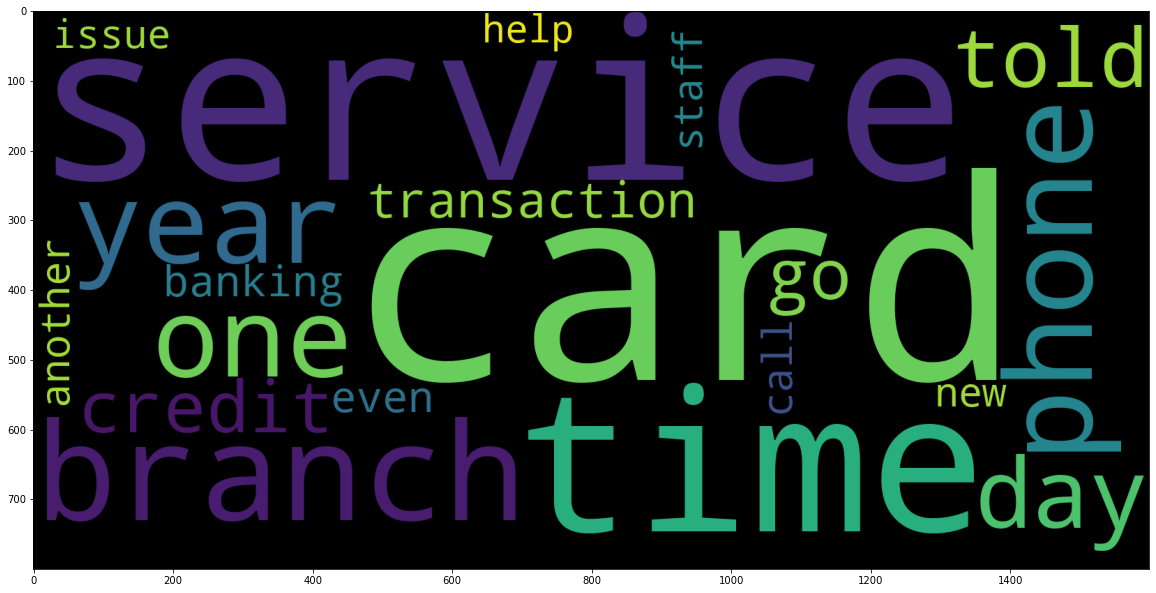

In [69]:
data_neg = corpus_new
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 20, width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vectorizer = TfidfVectorizer()

# Compute the TF-IDF weights for the corpus
tf_idf_weights = vectorizer.fit_transform(corpus_new)

# Print the weights for each word in each document
print(tf_idf_weights.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [57]:
feature_names = vectorizer.get_feature_names()
key_word_list=[]
# Loop through the rows of the weights matrix to find the most important features
for i in range(tf_idf_weights.shape[0]):
    row = tf_idf_weights.getrow(i).toarray()[0]
    top_features_idx = row.argsort()[-10:]  # replace n with the number of top features to extract
    top_features = [feature_names[j] for j in top_features_idx]
    print(f"Document {i+1} top features: {', '.join(top_features)}")
    key_word_list.append(feature_names)

Document 1 top features: sadly, handler, highest, upsetting, susan, hire, call, issue, called, staff
Document 2 top features: century, halifax, outside, demand, roll, grass, moaning, staff, understand, review
Document 3 top features: hornchurch, ge, discussing, staff, change, member, may, credited, concentrating, cheque
Document 4 top features: class, believing, ticket, basis, ask, rd, irresponsible, jet, easy, party
Document 5 top features: suffer, contempt, status, indifference, bear, belonged, agoraphobia, pure, another, money
Document 6 top features: day, bye, mix, hopefully, minimum, alert, credit, report, late, payment
Document 7 top features: urgency, coffee, authority, trying, complaint, team, two, matter, purchase, assume
Document 8 top features: woman, worry, experienced, fief, said, rude, speak, come, phoned, back
Document 9 top features: specially, served, givenmany, nuisance, could, long, waiting, later, people, etc
Document 10 top features: opening, started, thought, smal

In [59]:
corpus_new[1]

'understand lot review lol never ever problem halifax current account credit card looking review clear people understand thing work st century expect staff roll see every demand feel sorry staff deal folk read review keep everyone else maybe go outside touch grass start moaning'

In [55]:
word_frame=pd.value_counts(np.array(key_word_list[0]))

In [104]:
words_all=[]
for i in range(len(corpus_new)):
    words = nltk.tokenize.word_tokenize(corpus_new[i])
    words_all.append(words)
freq_dist = nltk.FreqDist(words_all[1])
sorted_words = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

top_10_words = sorted_words[:20]

print(top_10_words)

[('review', 3), ('understand', 2), ('staff', 2), ('lot', 1), ('lol', 1), ('never', 1), ('ever', 1), ('problem', 1), ('halifax', 1), ('current', 1), ('credit', 1), ('card', 1), ('looking', 1), ('clear', 1), ('people', 1), ('thing', 1), ('work', 1), ('st', 1), ('century', 1), ('expect', 1)]


In [77]:
corpus_new[0]

'ok read hope really take effort train staff least hire better quality staff work called online banking issue call handler called susan extremely unprofessional issue sorted also left highest upsetting level call complaint sadly happens bad experience staff yes know main reason leave'

In [85]:
words_all[0]

['ok',
 'read',
 'hope',
 'really',
 'take',
 'effort',
 'train',
 'staff',
 'least',
 'hire',
 'better',
 'quality',
 'staff',
 'work',
 'called',
 'online',
 'banking',
 'issue',
 'call',
 'handler',
 'called',
 'susan',
 'extremely',
 'unprofessional',
 'issue',
 'sorted',
 'also',
 'left',
 'highest',
 'upsetting',
 'level',
 'call',
 'complaint',
 'sadly',
 'happens',
 'bad',
 'experience',
 'staff',
 'yes',
 'know',
 'main',
 'reason',
 'leave']

In [99]:
words_all=[]
for i in range(len(corpus_new)):
    words = nltk.tokenize.word_tokenize(corpus_new[i])
    words_all.append(words)
    
# print(words_all)
words_all_1=' '.join(words_all[0])
print(words_all_1)

ok read hope really take effort train staff least hire better quality staff work called online banking issue call handler called susan extremely unprofessional issue sorted also left highest upsetting level call complaint sadly happens bad experience staff yes know main reason leave
